In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-auction-2023/iplauction2023.csv


 **Importing Libraries & loading the ipl dataset**

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/ipl-auction-2023/iplauction2023.csv")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


**Checking others info of that particular dataset**

In [119]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


**Now checking if there are any NaN values, and if so, in how many columns they occur**

In [120]:
df.isna().any()

name                     False
player style             False
nationality              False
base price (in lacs)      True
final price (in lacs)     True
franchise                 True
status                   False
dtype: bool

**Now checking which columns have how many NaN values**

In [121]:
df.isna().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

**Now filling NAN values / handling NAN values**

In [122]:
df['base price (in lacs)']=df['base price (in lacs)'].fillna(0)
df['final price (in lacs)'] =df['final price (in lacs)'].fillna(0)
df['franchise'] =df['franchise'].fillna('UNSOLD')
df.sample(10)


,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
71,Jagadeesha Suchith,Allrounder,India,20.0,0.0,UNSOLD,UNSOLD
229,Darshan Nalkande,Bowler,India,0.0,20.0,GT,RETAINED
194,Avesh Khan,Bowler,India,0.0,1000.0,LSG,RETAINED
193,Tushar Deshpande,Bowler,India,0.0,20.0,CSK,RETAINED
293,Marcus Stoinis,Allrounder,Australia,0.0,920.0,LSG,RETAINED
254,Krishnappa Gowtham,Allrounder,India,0.0,90.0,LSG,RETAINED
224,Ripal Patel,Allrounder,India,0.0,20.0,DC,RETAINED
100,Shreyas Gopal,Bowler,India,20.0,0.0,UNSOLD,UNSOLD
172,Kuldeep Yadav,Bowler,India,0.0,200.0,DC,RETAINED
271,Kagiso Rabada,Bowler,South Africa,0.0,925.0,PBKS,RETAINED


**Exploring value counts of different players & countries **

In [123]:
df['player style'].value_counts()


player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

In [124]:
df['nationality'].value_counts()

nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: int64

**Let's plot the different types of players**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

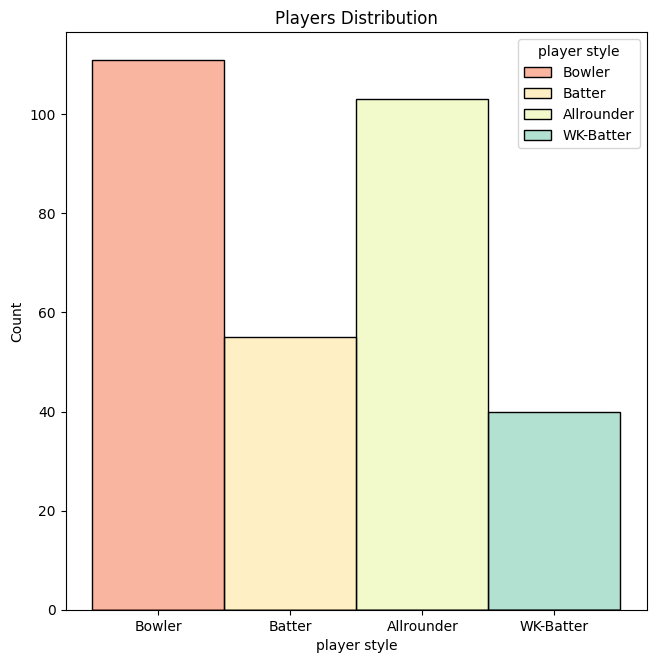

In [125]:
plt.figure(figsize=(7.5,7.5))
sns.histplot(df ,x='player style' ,hue = 'player style',palette='Spectral')
plt.title("Players Distribution")
plt.show()


**Let's plot the different types of players countries**

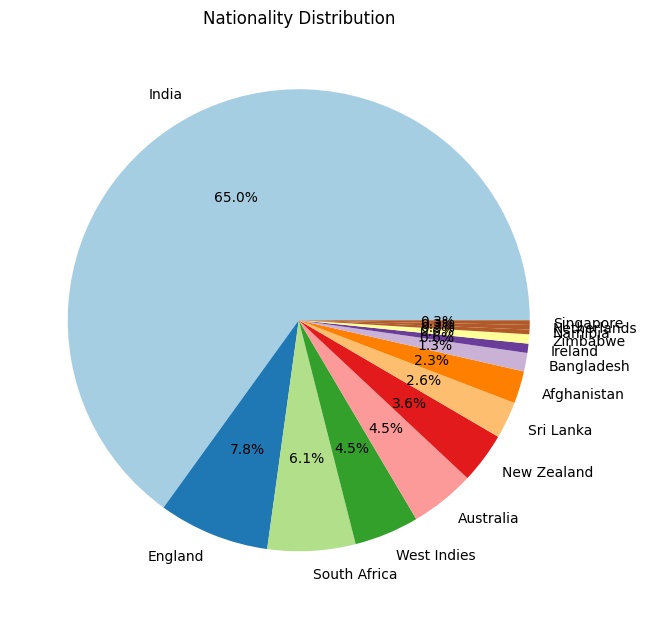

In [126]:
nationality =df['nationality'].value_counts()
plt.figure(figsize=(7.5,7.5))

plt.pie(nationality, labels=nationality.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(nationality))))

plt.title("Nationality Distribution")
plt.show()

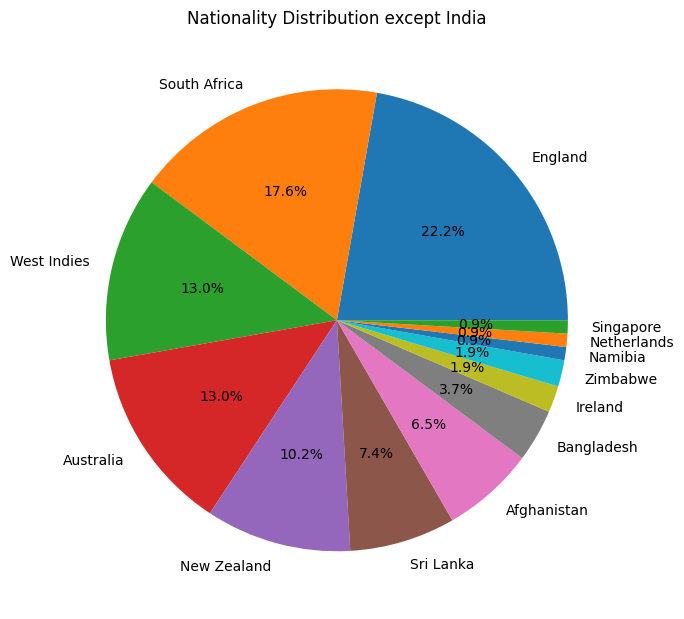

In [127]:
nationality =df['nationality'].value_counts()
plt.figure(figsize=(7.5,7.5))

if 'India' in nationality:
    nationality = nationality.drop('India')
    
nationality_percentages = nationality / nationality.sum()
plt.pie(nationality_percentages, labels=nationality_percentages.index, autopct='%1.1f%%')

plt.title("Nationality Distribution except India")
plt.show()

**Sold , Unsold & Retained visualization**

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

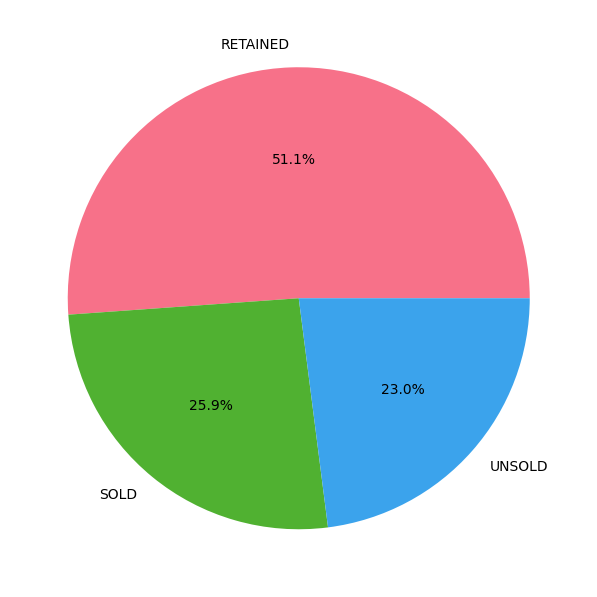

In [128]:
status_counts= df['status'].value_counts()
plt.figure(figsize=(7.5,7.5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',colors=sns.color_palette('husl', len(status_count)))

sns.color_palette('husl', len(status_count))

**Top performer (Who get more in final price than base price)**

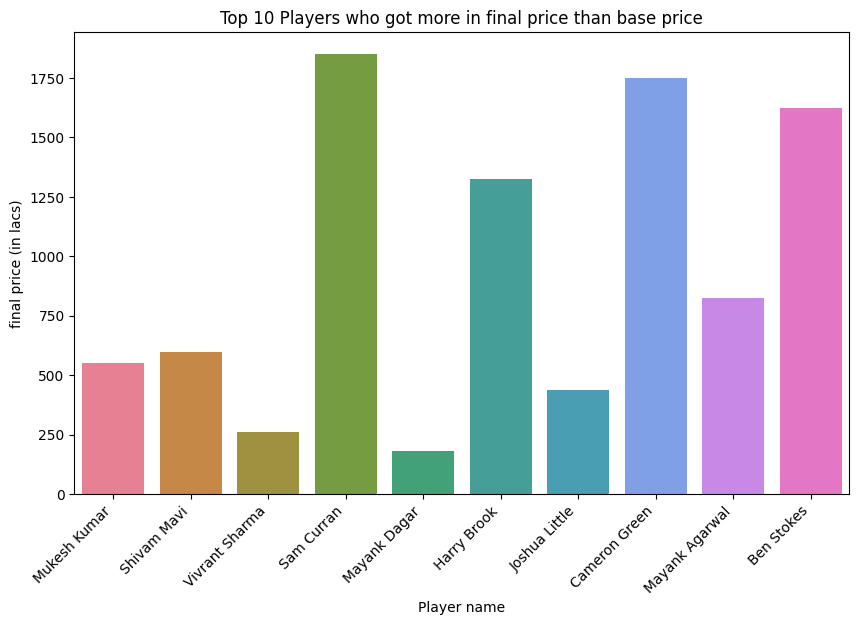

In [129]:
df['final ratio base']= df['final price (in lacs)'] / df['base price (in lacs)']
sold_players= df[df['status']=='SOLD']
top10_performer = sold_players.sort_values(by= 'final ratio base' , ascending= False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_performer,x='name', y='final price (in lacs)',  palette='husl')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Player name')
plt.title("Top 10 Players who got more in final price than base price")
plt.show()

**Highest paid retained players list**

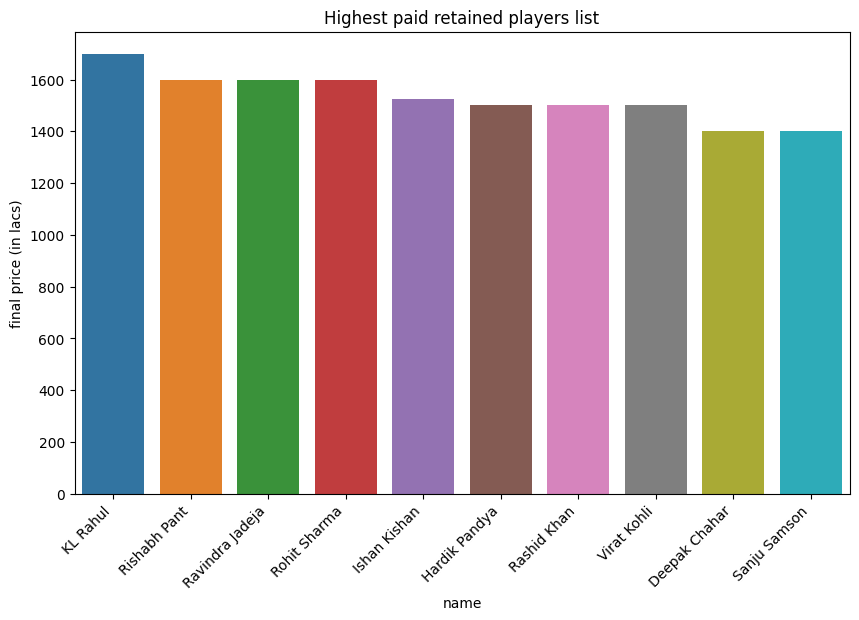

In [130]:
retained_players=df[df['status']=='RETAINED']
top10_retained_players= retained_players.sort_values(by='final price (in lacs)', ascending =False ).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_retained_players , x='name',y='final price (in lacs)')
plt.xticks(rotation=45, ha='right')
plt.title("Highest paid retained players list")
plt.show()

**Highest paid unsold players list**


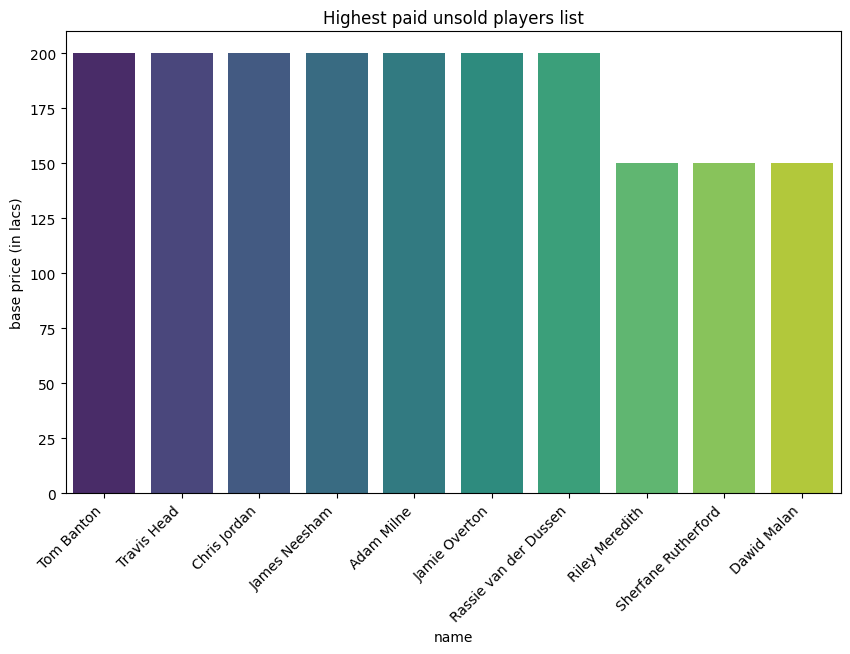

In [131]:
unsold_players=df[df['status']=='UNSOLD']
top10_unsold_players= unsold_players.sort_values(by='base price (in lacs)', ascending =False ).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_unsold_players , x='name',y='base price (in lacs)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Highest paid unsold players list")
plt.show()